In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from scipy.stats import gaussian_kde

In [2]:
data = np.array([5.3, 2.9, 4.7, 5.1, 3.2, 4.8, 5.0, 4.3, 3.7, 4.6])

n_bootstrap_samples = 100
bandwidths = np.linspace(0.1, 1.0, 10)

kde_functions = []

for _ in range(n_bootstrap_samples):
    bootstrap_sample = resample(data, replace=True, n_samples=len(data))

    for bandwidth in bandwidths:
        kde = gaussian_kde(bootstrap_sample, bw_method=bandwidth)
        kde_functions.append(kde)

x_grid = np.linspace(min(data), max(data), 1000)
combined_pdf = np.zeros_like(x_grid)

for kde in kde_functions:
    combined_pdf += kde(x_grid)

combined_pdf /= (len(kde_functions))

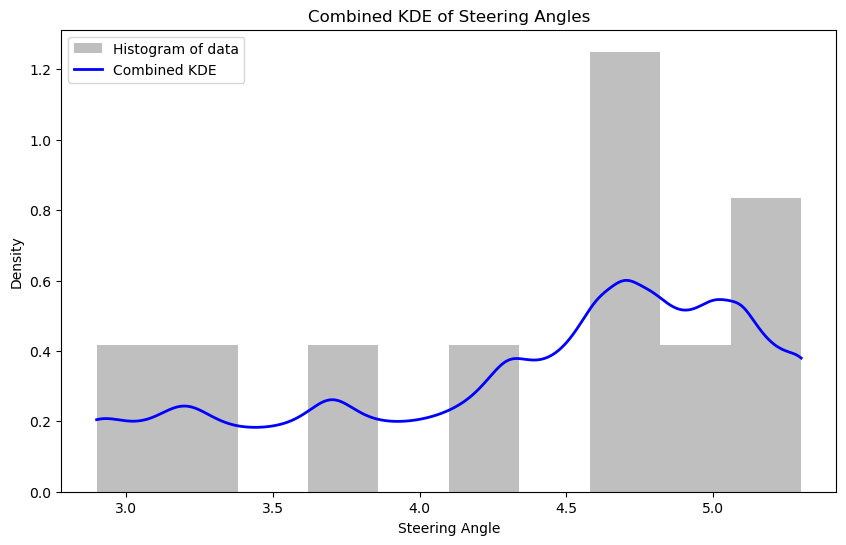

In [3]:
plt.figure(figsize=(10, 6))
plt.hist(data, bins=10, density=True, alpha=0.5, color='gray', label='Histogram of data')
plt.plot(x_grid, combined_pdf, color='blue', lw=2, label='Combined KDE')
plt.xlabel('Steering Angle')
plt.ylabel('Density')
plt.title('Combined KDE of Steering Angles')
plt.legend()
plt.show()